In [1]:
import pandas as pd

In [44]:
# load the data
SPEAKER_WITH_AFFILIATION_PATH = "../data/binary/data-2020.pickle"
speaker_with_affiliation = pd.read_pickle(SPEAKER_WITH_AFFILIATION_PATH)
speaker_with_affiliation.head()

In [46]:
df.shape

(4403942, 5)

In [55]:
df.head()

,speaker_id,quote_id,quotation,speaker,party
0,22686,2019-04-08-048753,It is immoral. It is harmful. It is hurtful.,Donald Trump,29468
1,22686,2019-05-26-025817,It is where they want to be and where they sho...,Donald Trump,29468
2,22686,2019-03-20-001438,"a horrible, disgraceful thing and a horrible act.",Donald Trump,29468
3,22686,2019-03-29-004685,Allies expressed their support for the secreta...,Donald Trump,29468
4,22686,2019-07-23-003672,"And if I can help, I would love to be a mediator.",Donald Trump,29468


In [47]:
# ten most common speakers
df["speaker"].value_counts()[:10]

Donald Trump        202822
Narendra Modi        52326
Joe Biden            37393
Bernie Sanders       33695
Boris Johnson        30615
Elizabeth Warren     28862
Nancy Pelosi         27043
Mike Pompeo          25425
Pete Buttigieg       22363
Rahul Gandhi         18567
Name: speaker, dtype: int64

In [57]:
# not that many repeating names anymore, makes more sense
speakers = df[["speaker", "speaker_id"]].drop_duplicates()
speakers["speaker"].value_counts()

Bob Smith                3
José Javier Rodríguez    2
Jim McGovern             2
David Anderson           2
Joan Hall                2
                        ..
Mette Bock               1
Karen McPherson          1
Pierre Moreau            1
Thomas G. Saylor         1
Taavi Rõivas             1
Name: speaker, Length: 41186, dtype: int64

In [60]:
df["party"].value_counts()

29552      1084689
29468      1012986
10230       185543
9626        178604
10225       121468
            ...   
563535           1
3040266          1
1851370          1
1200751          1
1523085          1
Name: party, Length: 2583, dtype: int64

In [61]:
# US: Q29468 is the republican party, Q29552 is the Democratic party
# UK: Q9626 is the Conservative party, Q9630 is the Labour party, Q622441 is the Liberal Party
# AU: Q216082 is the Australian Labor party, Q241149 is the Liberal party of Australia, 

In [64]:
# split into democrats and republicans
democrats = speaker_with_affiliation[speaker_with_affiliation["party"] == 29552]
republicans = speaker_with_affiliation[speaker_with_affiliation["party"] == 29468]

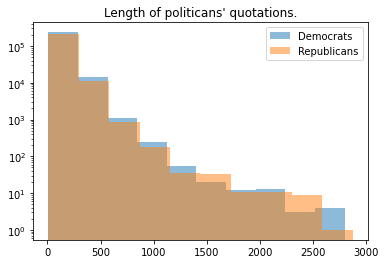

In [65]:
# example analysis
import matplotlib.pyplot as plt

democrats_lengths = democrats["quotation"].apply(lambda x: len(x))
republicans_lengths = republicans["quotation"].apply(lambda x: len(x))

plt.hist(democrats_lengths, log=True,alpha=0.5, label="Democrats")
plt.hist(republicans_lengths, log=True, alpha=0.5, label = "Republicans")
plt.title("Length of politicans' quotations.")
plt.legend()
plt.show()